In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
url = "https://raw.githubusercontent.com/codebasics/py/master/ML/14_naive_bayes/spam.csv"
my_df = pd.read_csv(url)
my_df

In [3]:
# Converting string values in the Category column into numerical values
my_df['spam'] = my_df['Category'].apply(lambda x:1 if x=='spam' else 0)
my_df

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will ü b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [4]:
inputs = my_df.Message
target = my_df.spam
inputs.shape, target.shape

((5572,), (5572,))

In [5]:
# Splitting the datasets into train and test
from sklearn.model_selection import train_test_split
inputs_train, inputs_test, target_train, target_test = train_test_split(inputs, target, test_size=0.25, random_state=88)
print("Training datasets: ", inputs_train.shape, target_train.shape)
print("Testing datasets: ", inputs_test.shape, target_test.shape)

Training datasets:  (4179,) (4179,)
Testing datasets:  (1393,) (1393,)


In [7]:
# Building Vectorizer and MultinomialNB pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
pipe = Pipeline([('vectorizer', CountVectorizer()) , ('nb', MultinomialNB())])

In [8]:
# Training the model using the pipepline fucntion
pipe.fit(inputs_train, target_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [9]:
# Predict the target values for the testing data
target_pred = pipe.predict(inputs_test)

Model accuracy score:  0.9842067480258435
Model precision score:  0.9774011299435028
Model f1 score:  0.9402173913043479
Model recall score:  0.9057591623036649
Model roc-auc score:  0.9512156876410172


Text(33.22222222222222, 0.5, 'Predicted')

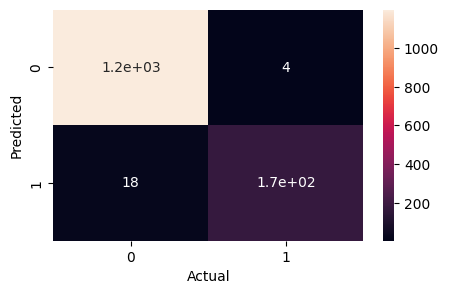

In [10]:
# Evaluating the performance
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, roc_auc_score, confusion_matrix
print("Model accuracy score: ", accuracy_score(target_test, target_pred))
print("Model precision score: ", precision_score(target_test, target_pred))
print("Model f1 score: ", f1_score(target_test, target_pred))
print("Model recall score: ", recall_score(target_test, target_pred))
print("Model roc-auc score: ", roc_auc_score(target_test, target_pred))
# print("Model confusion matrix: ", confusion_matrix(target_test, target_pred))
# To find where the model made mistakes
import seaborn as sn
plt.figure(figsize=(5,3))
sn.heatmap(confusion_matrix(target_test, target_pred), annot=True)
plt.xlabel("Actual")
plt.ylabel("Predicted")

In [15]:
# Example email message
#email_message = ["Hi John, this is to inform that Lucy is on leave today, so we will take up your request tommorrow"]
email_message = ["Get a free cruise now! Limited time offer. Click here to claim your prize."]
#email_message = ["Free!! Free!! Get a free iphone, if you can do a headstand for 5 min straight. Visit our Yogabar today!!"]

# Predict whether the email is spam or not
prediction = pipe.predict(email_message)

#Print the prediction
if prediction[0] == 1:
    print("Spam!!!")
else:
    print("Not spam.")


Spam!!!
